<a href="https://colab.research.google.com/github/LeninGF/yolov8MobileApp/blob/main/yolov8mobileapp/notebooks/yoloV8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Mobile APP using Yolo v8 Model

* Coders:
    - Lenin Falconí
    - Mario Moreno
    - Jonathan Zea

## Goals

- Obtener un modelo en /TFLITE/ para consumir modelos de Yolo en sistemas móbiles como Android
- Explorar las predicciones con Yolo

In [3]:
!pip install ultralytics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 898.8/898.8 kB 37.1 MB/s eta 0:00:00


In [23]:
from ultralytics import YOLO
model = YOLO('yolov8n.pt', task='detect')

In [5]:
categories_names = model.names

In [24]:
import pandas as pd
categories_df = pd.DataFrame(categories_names.items(), columns=['id', 'name'])
categories_df.head(10)

,id,name
0,0,person
1,1,bicycle
2,2,car
3,3,motorcycle
4,4,airplane
5,5,bus
6,6,train
7,7,truck
8,8,boat
9,9,traffic light


In [9]:
import json
with open('categories.json', 'w') as f:
    json.dump(categories_names, f)

In [ ]:
# !pip install torchsummary

In [ ]:
# model

In [25]:
# Inference
# import cv2
# img = cv2.imread('.././data/zidane.jpg')
results = model.predict("https://ultralytics.com/images/zidane.jpg")


Found https://ultralytics.com/images/zidane.jpg locally at zidane.jpg
image 1/1 /content/zidane.jpg: 384x640 2 persons, 1 tie, 9.8ms
Speed: 2.2ms preprocess, 9.8ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)


In [26]:
results

[ultralytics.engine.results.Results object with attributes:
 
 boxes: ultralytics.engine.results.Boxes object
 keypoints: None
 masks: None
 names: {0: 'person', 1: 'bicycle', 2: 'car', 3: 'motorcycle', 4: 'airplane', 5: 'bus', 6: 'train', 7: 'truck', 8: 'boat', 9: 'traffic light', 10: 'fire hydrant', 11: 'stop sign', 12: 'parking meter', 13: 'bench', 14: 'bird', 15: 'cat', 16: 'dog', 17: 'horse', 18: 'sheep', 19: 'cow', 20: 'elephant', 21: 'bear', 22: 'zebra', 23: 'giraffe', 24: 'backpack', 25: 'umbrella', 26: 'handbag', 27: 'tie', 28: 'suitcase', 29: 'frisbee', 30: 'skis', 31: 'snowboard', 32: 'sports ball', 33: 'kite', 34: 'baseball bat', 35: 'baseball glove', 36: 'skateboard', 37: 'surfboard', 38: 'tennis racket', 39: 'bottle', 40: 'wine glass', 41: 'cup', 42: 'fork', 43: 'knife', 44: 'spoon', 45: 'bowl', 46: 'banana', 47: 'apple', 48: 'sandwich', 49: 'orange', 50: 'broccoli', 51: 'carrot', 52: 'hot dog', 53: 'pizza', 54: 'donut', 55: 'cake', 56: 'chair', 57: 'couch', 58: 'potted p


Found https://ultralytics.com/images/zidane.jpg locally at zidane.jpg
image 1/1 /content/zidane.jpg: 384x640 2 persons, 1 tie, 7.0ms
Speed: 1.8ms preprocess, 7.0ms inference, 1.3ms postprocess per image at shape (1, 3, 384, 640)


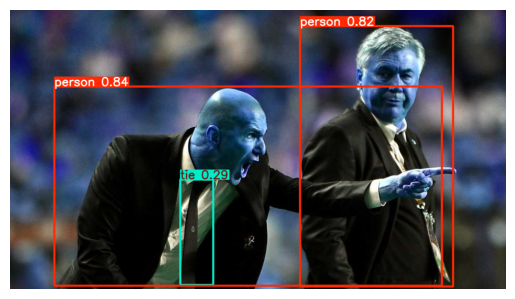

In [30]:
# prompt: help me with code to show model predictions for yolov8 ultralytics in an image

import matplotlib.pyplot as plt
import cv2

# Assuming 'results' is the output from model.predict() as in your previous code

results = model.predict("https://ultralytics.com/images/zidane.jpg")

# Assuming you want to display the first result (if there are multiple)
res = results[0]

# Plot the image with bounding boxes and labels
res_plotted = res.plot()

# Display the image using matplotlib
plt.imshow(res_plotted)
plt.axis('off')  # Hide axes
plt.show()

## TFLite
Para convertir el modelo a tflite se va a seguir el proceso indicado en




In [20]:
model.export(format="tflite")

Ultralytics 8.3.48 🚀 Python-3.10.12 torch-2.5.1+cu121 CPU (Intel Xeon 2.00GHz)

PyTorch: starting from 'yolov8n.pt' with input shape (1, 3, 640, 640) BCHW and output shape(s) (1, 84, 8400) (6.2 MB)
requirements: Ultralytics requirements ['sng4onnx>=1.0.1', 'onnx_graphsurgeon>=0.3.26', 'onnx>=1.12.0', 'onnx2tf>1.17.5,<=1.22.3', 'onnxslim>=0.1.31', 'tflite_support', 'onnxruntime-gpu'] not found, attempting AutoUpdate...
Looking in indexes: https://pypi.org/simple, https://pypi.ngc.nvidia.com
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 136.6/136.6 kB 21.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.4/56.4 kB 248.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.0/16.0 MB 43.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 435.0/435.0 kB 300.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 142.9/142.9 kB 364.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.8/60.8 MB 76.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━

100%|██████████| 1.11M/1.11M [00:00<00:00, 51.4MB/s]
Unzipping calibration_image_sample_data_20x128x128x3_float32.npy.zip to /content/calibration_image_sample_data_20x128x128x3_float32.npy...: 100%|██████████| 1/1 [00:00<00:00, 47.55file/s]


ONNX: starting export with onnx 1.17.0 opset 19...


ONNX: slimming with onnxslim 0.1.43...
ONNX: export success ✅ 1.2s, saved as 'yolov8n.onnx' (12.3 MB)
TensorFlow SavedModel: starting TFLite export with onnx2tf 1.22.3...
TensorFlow SavedModel: export success ✅ 56.6s, saved as 'yolov8n_saved_model' (30.9 MB)

TensorFlow Lite: starting export with tensorflow 2.17.1...
TensorFlow Lite: export success ✅ 0.0s, saved as 'yolov8n_saved_model/yolov8n_float32.tflite' (12.3 MB)

Export complete (58.8s)
Results saved to /content
Predict:         yolo predict task=detect model=yolov8n_saved_model/yolov8n_float32.tflite imgsz=640  
Validate:        yolo val task=detect model=yolov8n_saved_model/yolov8n_float32.tflite imgsz=640 data=coco.yaml  
Visualize:       https://netron.app


'yolov8n_saved_model/yolov8n_float32.tflite'

In [21]:
# prompt: please help me to create zip file from a folder using python

import zipfile
import os

def zip_folder(folder_path, zip_file_name):
  """
  Creates a zip archive from a specified folder.

  Args:
      folder_path: The path to the folder to be zipped.
      zip_file_name: The name of the output zip file.
  """
  try:
    with zipfile.ZipFile(zip_file_name, 'w', zipfile.ZIP_DEFLATED) as zipf:
      for root, _, files in os.walk(folder_path):
        for file in files:
          file_path = os.path.join(root, file)
          zipf.write(file_path, arcname=os.path.relpath(file_path, folder_path))
    print(f"Successfully created '{zip_file_name}'")
  except FileNotFoundError:
    print(f"Error: Folder '{folder_path}' not found.")
  except Exception as e:
    print(f"An error occurred: {e}")


# Example usage: Replace 'path/to/your/folder' and 'your_zip_file.zip'
# with the actual folder path and desired zip file name.
zip_folder('/content/yolov8n_saved_model', 'yolov8n_savedmodel.zip')

Successfully created 'yolov8n_savedmodel.zip'


## Testeo de Modelo TFLITE

Se procede a leer una imagen por defecto y revisar las predicciones realizadas por el modelo

In [2]:
import cv2
import urllib.request
import numpy as np

def url_to_image(url):
  """
  Downloads an image from a URL and converts it to an OpenCV-compatible format.

  Args:
    url: The URL of the image to download.

  Returns:
    A NumPy array representing the image.
  """
  resp = urllib.request.urlopen(url)
  image = np.asarray(bytearray(resp.read()), dtype="uint8")
  image = cv2.imdecode(image, cv2.IMREAD_COLOR)
  return image

# Example usage
image_url = 'https://ultralytics.com/images/bus.jpg'
img = url_to_image(image_url)

# Now you can use 'img' with cv2 functions
# Convert the image to RGB (if it's not already)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
img = cv2.resize(img, (640, 640))  # Resize as needed
img.shape

(640, 640, 3)

In [33]:
# prompt: help me with code to load the tflite model and test it on a prediction maybe we use ultralytics again

import tensorflow as tf
from ultralytics import YOLO
import cv2
import matplotlib.pyplot as plt

# Load the TFLite model
interpreter = tf.lite.Interpreter(model_path="/content/yolov8n_saved_model/yolov8n_float32.tflite") # Replace with your model path
interpreter.allocate_tensors()

# Get input and output details
input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()

# Load and preprocess the image (example)
# img = cv2.imread("zidane.jpg") # Replace with your image
# img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
# input_shape = input_details[0]['shape'][1:3]
# img = cv2.resize(img, input_shape)
input_data = img.astype('float32') / 255.0
input_data = input_data[tf.newaxis, ...]

# Perform inference
interpreter.set_tensor(input_details[0]['index'], input_data)
interpreter.invoke()

# Get the output
output_data = interpreter.get_tensor(output_details[0]['index'])
output_data

array([[[  0.0054377,    0.035039,    0.050834, ...,     0.81277,     0.83892,     0.92504],
        [  0.0088815,   0.0062209,   0.0054307, ...,     0.97086,     0.94224,     0.90587],
        [   0.011306,    0.070369,     0.10151, ...,     0.37927,     0.36466,     0.17413],
        ...,
        [ 2.3395e-07,  1.0903e-07,  7.1836e-08, ...,  9.4214e-07,  9.2758e-07,  1.3653e-06],
        [ 1.0193e-07,  8.0068e-08,  4.4498e-08, ...,  9.6749e-07,  9.1578e-07,  9.7069e-07],
        [ 1.4657e-07,  5.9202e-08,  3.4217e-08, ...,  1.1597e-06,  1.0734e-06,  1.1158e-06]]], dtype=float32)

In [34]:
output_data.shape

(1, 84, 8400)

In [38]:
# Assuming output_data has shape [1, 84, 8400]
import numpy as np
output_data = np.squeeze(output_data) # Remove batch dimension
# Number of classes (excluding background)
num_classes = 80
# Adjust according to your model
num_detections = output_data.shape[-1]
num_detections

8400

## Testeo de TFLITE Model con Ultralytics


In [ ]:
from ultralytics import YOLO
path_model = ".././models/yolov8n_savedmodel/yolov8n_float32.tflite"
model = YOLO(path_model)

WARNING ⚠️ Unable to automatically guess model task, assuming 'task=detect'. Explicitly define task for your model, i.e. 'task=detect', 'segment', 'classify','pose' or 'obb'.


Es posible que sea necesario instalar:

```shell
pip install tflite-runtime
```

Además ha de existir un entorno con las instalaciones recomendadas por ultralytics de acuerdo a

https://docs.ultralytics.com/guides/conda-quickstart/#speeding-up-installation-with-libmamba

In [5]:
results = model(img)


Ultralytics 8.3.40 🚀 Python-3.11.11 torch-2.5.1.post6 CPU (Intel Core(TM) i7-9700K 3.60GHz)
Loading ../models/yolov8n_savedmodel/yolov8n_float32.tflite for TensorFlow Lite inference...


INFO: Created TensorFlow Lite XNNPACK delegate for CPU.


0: 640x640 4 persons, 1 bus, 184.5ms
Speed: 203.2ms preprocess, 184.5ms inference, 324.6ms postprocess per image at shape (1, 3, 640, 640)


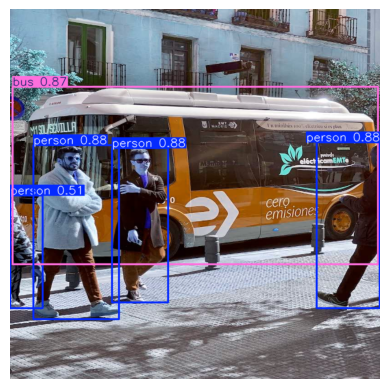

In [13]:
import matplotlib.pyplot as plt
predicted_img = results[0].plot()
plt.imshow(cv2.cvtColor(predicted_img, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()